In [1]:
import jiwer
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from utils import load_custom_dataset

In [2]:
base_directory = Path.cwd().parent

dataset_name = "yale_econ251"
data_dir = base_directory / 'data'

dataset_size = "normal" # or 'tiny'

if dataset_size == "tiny":
    audio_dir = data_dir / 'inputs' / dataset_name / 'lectures-tiny'
    transcripts_dir = data_dir / 'inputs' / dataset_name / 'transcripts-tiny'
else:
    audio_dir = data_dir / 'inputs' / dataset_name / 'lectures'
    transcripts_dir = data_dir / 'inputs' / dataset_name / 'transcripts'


In [3]:

model_dir = "wav2vec2-base-100h" # baseline
# model_name = "facebook/wav2vec2-base"

In [4]:
lm_dataset = "other" #"glue" #"custom" #"glue" # or custom

In [5]:
predictions_dir = data_dir / 'predictions' / dataset_name / model_dir

In [6]:
import os
len(os.listdir(predictions_dir))

52

In [7]:
transformation = jiwer.Compose([
    jiwer.ToUpperCase(),
    jiwer.RemoveWhiteSpace(replace_by_space=True),
    jiwer.RemoveMultipleSpaces(),
    jiwer.RemovePunctuation(),
    jiwer.ReduceToListOfListOfWords(word_delimiter=" ")
])

In [8]:
errors = []

# selected_files = ['06']#['01', '02', '03', '04', '05' ]

for transcript in transcripts_dir.glob('*.txt'):
    file_no = transcript.stem
    # if file_no not in selected_files:
    #     continue

    # load the ground truth text
    with open(transcript, 'r') as f:
        ground_truth = f.read()

    # load the predicted text
    pred_file_name = 'pred_' + file_no + '_' + dataset_size + '_lm_' + lm_dataset
    pred_file_path = (predictions_dir / pred_file_name).with_suffix('.txt')

    # if not pred_file_path.is_file():
    #     print(pred_file_path)
    #     continue
    with open(pred_file_path, 'r') as f:
        hypothesis = f.read()

    # measures = jiwer.compute_measures(ground_truth,
    #                                   hypothesis,
    #                                   truth_transform=transformation,
    #                                   hypothesis_transform=transformation)

    wer = jiwer.wer(ground_truth,
                    hypothesis,
                    truth_transform=transformation,
                    hypothesis_transform=transformation)

    # wer = measures['wer']
    # mer = measures['mer']
    # wil = measures['wil']
    # errors.append([wer, mer, wil])
    errors.append(wer)


In [9]:
errors

[0.3555480378890392,
 0.3678957353790316,
 0.4064254809905183,
 0.3102791352604986,
 0.3634315424610052,
 0.4359044995408632,
 0.36285315119528094,
 0.39152875634933637,
 0.33417971505148825,
 0.3121073067419696,
 0.37777967112550054,
 0.41030383091149275,
 0.38090692124105013,
 0.3887578213150067,
 0.4304260376668495,
 0.37655343827671917,
 0.35047603547888356,
 0.3752386146713935,
 0.4324254661053355,
 0.42304266860982914,
 0.3782309274662374,
 0.4156859221992633,
 0.3302185883530786,
 0.3885001794043775,
 0.3887727963525836,
 0.3895582329317269]

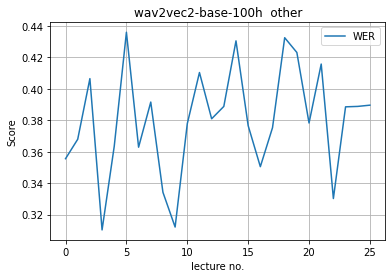

Average WER: 0.3798857889603215


In [10]:
xrange = [i for i in range(len(errors))]
plt.plot(xrange, errors, label="WER")
# plt.plot(xrange, np.array(errors)[:,0], label="WER")
# plt.plot(xrange, np.array(errors)[:,1], label="MER")
# plt.plot(xrange, np.array(errors)[:,2], label="WIL")
plt.title(f"{model_dir}  {lm_dataset}")
plt.xlabel("lecture no.")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

# print(f"Average WER: {np.average(np.array(errors)[:,0])}")
# print(f"Average MER: {np.average(np.array(errors)[:,1])}")
# print(f"Average WIL: {np.average(np.array(errors)[:,2])}")
print(f"Average WER: {np.average(np.array(errors))}")